# Table of Content
1. [Loading the Data](#1.-Loading-the-Data)
2. [Reading Data](#2.-Reading-Data)
3. [Fixing missing values](#3.-Fixing-missing-values)
4. [Solving different locations problem](#4.-Solving-different-locations-problem)
5. [Encoding categorical feature](#5.-Encoding-categorical-feature)
6. [EDA](#6.-EDA)
7. [Modelling](#7.-Modelling)
8. [Submission](#8.-Submission)

# 1. Loading the Data

In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

/kaggle/input/widsdatathon2023/train_data.csv
/kaggle/input/widsdatathon2023/test_data.csv
/kaggle/input/widsdatathon2023/sample_solution.csv


# 2. Reading Data

In [2]:
train_df = pd.read_csv('/kaggle/input/widsdatathon2023/train_data.csv')
test_df = pd.read_csv('/kaggle/input/widsdatathon2023/test_data.csv')
Target = 'contest-tmp2m-14d__tmp2m'

In [3]:
train_df

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-tmp2m-14d__tmp2m,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,climateregions__climateregion,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010

In [4]:
test_df

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,climateregions__climateregion,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010-5,wind-uwnd-925-2010-6,w

In [5]:
train_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375734 entries, 0 to 375733
Data columns (total 246 columns):
 #    Column                                    Non-Null Count   Dtype  
---   ------                                    --------------   -----  
 0    index                                     375734 non-null  int64  
 1    lat                                       375734 non-null  float64
 2    lon                                       375734 non-null  float64
 3    startdate                                 375734 non-null  object 
 4    contest-pevpr-sfc-gauss-14d__pevpr        375734 non-null  float64
 5    nmme0-tmp2m-34w__cancm30                  375734 non-null  float64
 6    nmme0-tmp2m-34w__cancm40                  375734 non-null  float64
 7    nmme0-tmp2m-34w__ccsm30                   359800 non-null  float64
 8    nmme0-tmp2m-34w__ccsm40                   375734 non-null  float64
 9    nmme0-tmp2m-34w__cfsv20                   375734 non-null  float64
 10   nmme0-

In [6]:
test_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31354 entries, 0 to 31353
Data columns (total 245 columns):
 #    Column                                    Non-Null Count  Dtype  
---   ------                                    --------------  -----  
 0    index                                     31354 non-null  int64  
 1    lat                                       31354 non-null  float64
 2    lon                                       31354 non-null  float64
 3    startdate                                 31354 non-null  object 
 4    contest-pevpr-sfc-gauss-14d__pevpr        31354 non-null  float64
 5    nmme0-tmp2m-34w__cancm30                  31354 non-null  float64
 6    nmme0-tmp2m-34w__cancm40                  31354 non-null  float64
 7    nmme0-tmp2m-34w__ccsm30                   31354 non-null  float64
 8    nmme0-tmp2m-34w__ccsm40                   31354 non-null  float64
 9    nmme0-tmp2m-34w__cfsv20                   31354 non-null  float64
 10   nmme0-tmp2m-34w__gfd

# 3. Fixing missing values

In [7]:
def check_null_index(df):
    null_check_df = df.isnull().any()
    non_null_index_list = list((null_check_df[null_check_df==False]).index)
    null_index_list = list((null_check_df[null_check_df==True]).index)
    print(non_null_index_list)
    print(null_index_list)
    
    return null_index_list

In [8]:
#train_null_col

There are 8 columns in the training set that contains missing values

In [9]:
#test_null_col

The test set is clear.

In [10]:
def impute_number_col(df):
    null_col = ['nmme0-tmp2m-34w__ccsm30',
    'nmme-tmp2m-56w__ccsm3',
    'nmme-prate-34w__ccsm3',
    'nmme0-prate-56w__ccsm30',
    'nmme0-prate-34w__ccsm30',
    'nmme-prate-56w__ccsm3',
    'nmme-tmp2m-34w__ccsm3',
    'ccsm30']
    number_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    fixed_column_df = number_imputer.fit_transform(df[null_col])
    df[null_col] = fixed_column_df
    return df

In [11]:
nonnull_train_df = impute_number_col(train_df)

# 4. Solving different locations problem

In [12]:
# Concatenate train and test data
all_df = pd.concat([nonnull_train_df, test_df], axis=0)

# Create new feature 
all_df['loc_group'] = all_df.groupby(['lat','lon']).ngroup()

print(f'{all_df.loc_group.nunique()} unique locations')

# Split back up 
nonnull_train_df = all_df.iloc[:len(nonnull_train_df)]
test_df = all_df.iloc[len(nonnull_train_df):].drop(Target, axis=1)

575 unique locations


# 5. Encoding categorical feature

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
nonnull_train_df['climateregions__climateregion'] = le.fit_transform(nonnull_train_df['climateregions__climateregion'])
test_df['climateregions__climateregion'] = le.transform(test_df['climateregions__climateregion'])

# 6. EDA

In [14]:
nonnull_train_df.shape, test_df.shape

((375734, 247), (31354, 246))

<AxesSubplot:>

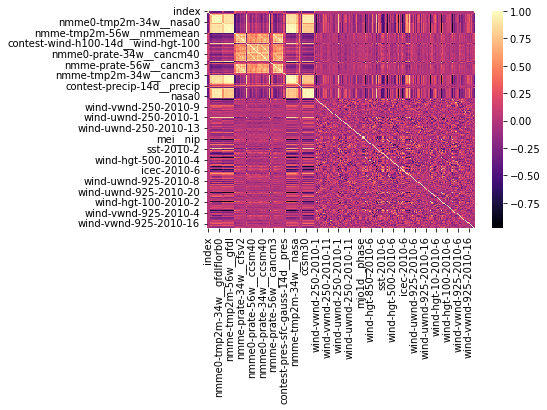

In [15]:
df_corr = nonnull_train_df.corr()
#plt.figure(figsize=(10,8))
sns.heatmap(df_corr,cmap='magma')

In [16]:
df_corr[Target].sort_values(ascending=False)

contest-tmp2m-14d__tmp2m                    1.000000
nmme-tmp2m-56w__cfsv2                       0.954668
nmme-tmp2m-34w__cfsv2                       0.954483
nmme-tmp2m-56w__nmmemean                    0.950865
nmme-tmp2m-34w__nmmemean                    0.950187
nmme-tmp2m-56w__gfdlflora                   0.949846
nmme-tmp2m-34w__gfdlflorb                   0.949346
nmme-tmp2m-56w__gfdlflorb                   0.949016
nmme-tmp2m-34w__gfdlflora                   0.947379
nmme-tmp2m-56w__ccsm4                       0.944435
nmme-tmp2m-34w__ccsm4                       0.943234
nmme-tmp2m-56w__nasa                        0.941429
nmme-tmp2m-34w__nasa                        0.940128
nmme-tmp2m-56w__gfdl                        0.937179
nmme-tmp2m-34w__gfdl                        0.936684
nmme-tmp2m-34w__cancm3                      0.931658
nmme-tmp2m-56w__cancm3                      0.930164
nmme-tmp2m-34w__cancm4                      0.928570
nmme-tmp2m-56w__cancm4                      0.

In [17]:
print("Data Size Before Correlated Column Removal :",nonnull_train_df.shape)
df_corr_outcome = df_corr[Target].sort_values(ascending=False)
df_corr_outcome = abs(df_corr_outcome).sort_values(ascending=False)
for col in range(len(df_corr_outcome)):
        if abs(df_corr_outcome[col])<0.15:
            nonnull_train_df.drop([df_corr_outcome.index[col]], axis=1, inplace=True)
            test_df.drop([df_corr_outcome.index[col]], axis=1, inplace=True)
            print(df_corr_outcome.index[col],"removed")
print("Data Size After Correlated Column Removal :",nonnull_train_df.shape)

Data Size Before Correlated Column Removal : (375734, 247)
wind-vwnd-250-2010-4 removed
nmme0-prate-56w__ccsm30 removed
wind-vwnd-250-2010-10 removed
wind-hgt-850-2010-2 removed
wind-vwnd-925-2010-4 removed
mjo1d__phase removed
wind-uwnd-925-2010-20 removed
nmme0-prate-34w__ccsm40 removed
wind-vwnd-925-2010-20 removed
wind-vwnd-250-2010-2 removed
wind-hgt-500-2010-3 removed
nmme0-prate-56w__cfsv20 removed
wind-vwnd-925-2010-12 removed
wind-uwnd-925-2010-10 removed
nmme0-prate-56w__nasa0 removed
mjo1d__amplitude removed
wind-uwnd-925-2010-7 removed
wind-uwnd-250-2010-17 removed
nmme0-prate-34w__gfdlflorb0 removed
wind-vwnd-250-2010-9 removed
nmme0-prate-34w__gfdlflora0 removed
wind-uwnd-925-2010-13 removed
nmme-prate-34w__gfdlflora removed
wind-vwnd-250-2010-5 removed
nmme0-prate-34w__cfsv20 removed
nmme-prate-34w__gfdlflorb removed
wind-hgt-500-2010-6 removed
wind-vwnd-250-2010-19 removed
nmme0-prate-34w__nasa0 removed
wind-uwnd-250-2010-9 removed
lon removed
wind-hgt-500-2010-4 remove

In [18]:
adv_train = nonnull_train_df.drop(['startdate'], axis = 1)
adv_train


,index,lat,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__gfdl,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-34w__ccsm30,contest-tmp2m-14d__tmp2m,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__gfdl,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,climateregions__climateregion,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-3,wind-vwnd-250-2010-7,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-17,wind-uwnd-250-2010-1,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-3,wind-hgt-850-2010-5,wind-hgt-850-2010-7,wind-hgt-850-2010-9,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-5,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-5,wind-uwnd-925-2010-6,wind-uwnd-925-2010-8,wind-uwnd-925-2010-9,wind-uwnd-925-2010-11,wind-uwnd-925-2010-12,wind-uwnd-925-2010-14,wind-hgt-10-2010-1,wind-hgt-10-2010-2,wind-hgt-10-2010-4,wind-hgt-10-2010-5,wind-hgt-10-2010-7,wind-hgt-10-2010-10,wind-hgt-100-2010-1,wind-hgt-100-2010-2,wind-hgt-100-2010-7,wind-hgt-100-2010-9,wind-hgt-100-2010-10,wind-vwnd-925-2010-1,wind-vwnd-925-2010-3,wind-vwnd-925-2010-9,wind-vwnd-925-2010-10,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-18,loc_group
0,0,0.0,237.00,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,29.66,30.46,31246.63,28.30,29.47,27.13,27.36,27.71,28.25,27.70,28.72,28.38,28.11,81.72,25.33,17.55,13.59,25.28,18.06,24.02,16666.81,5.19,28.744480,101352.08,4.41,18.45,18.36,10.35,35.40,19.54,24.43,98644.97,-2.56,27.83,29.34,27.57,27.98,27.30,28.27,28.42,28.30,28.55,28.17,42.45,-3.52,1535.52,-5.22,5899.66,30.18,32.86,28.85,30.73,29.33,31.66,31.45,31.33,29.51,30.65,0,200.0,-111.29,-129.06,-125.92,5.91,-208.23,18.67,43.65,628.66,163.84,80.55,-86.61,-109.81,125.75,35.85,-17.34,4.0,-2277.72,-2321.02,1064.98,77.17,-160.02,352.20,-22.37,-19.69,13.58,19.29,-12.78,-25.20,7.55,-33.72,23.53,-7267.97,1410.84,714.05,1549.20,-602.97,-4.33,0.97,0.15,-0.16,-0.08,0.15,-0.06,0.03,0.03,0.13,143.64,124.30,-1.43,61.40,89.64,-9.56,66.65,-69.20,-72427.68,-16054.10,-4560.34,7128.13,-6076.15,-3051.21,-25749.70,-5160.59,1544.02,-1267.75,-2402.46,-107.46,29.16,4.18,69.09,-2.03,48.13,-13.50,0
1,1,0.0,228.90,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,29.66,30.46,31244.78,28.30,29.47,27.13,27.36,27.71

In [19]:
adv_train_1 = adv_train.drop([Target], axis=1)

In [20]:
Features = adv_train_1.columns

# 7. Modelling

In [21]:
import lightgbm as lgbm
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm.sklearn import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor

In [22]:
train_df = adv_train.iloc[:-len(test_df),:]
test_df = adv_train.iloc[-len(test_df):,:].drop('contest-tmp2m-14d__tmp2m', axis=1).reset_index(drop=True)

X = train_df.drop(['contest-tmp2m-14d__tmp2m', 'index'], axis=1)
y = train_df['contest-tmp2m-14d__tmp2m']
X_test = test_df.drop('index', axis=1)

In [23]:
from sklearn.model_selection import KFold

In [24]:
import lightgbm as lgbm
from lightgbm.sklearn import LGBMRegressor

n_folds = 10
k_fold = KFold(n_splits=n_folds, random_state=42, shuffle=True)

eval_predsLB = []
predsLB = []

MODEL_PARAMS = {
                       'learning_rate': 0.01,
                       'max_depth': 9,
                       'num_leaves': 90,
                       'colsample_bytree': 0.8,
                       'subsample': 0.9,
                       'subsample_freq': 5,
                       'min_child_samples': 36,
                       'reg_lambda': 28,
                       'n_estimators': 100,#Original 20000
                       'metric': 'rmse',
                       'random_state': 1
}

callbacks = [lgbm.early_stopping(30, verbose=1), lgbm.log_evaluation(period=0)]

for train_index, test_index in k_fold.split(X, y):
    X_train, X_valid = X.iloc[train_index], X.iloc[test_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[test_index]
    
    model = lgbm.LGBMRegressor(**MODEL_PARAMS)
    
    model.fit(X=X_train, y=y_train,
          eval_set=[(X_valid, y_valid)],
          callbacks=callbacks
         )
    predsLB.append(model.predict(X_test))

Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 3.95537
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 3.93596
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 3.93596
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 3.93596
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 3.93596
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 3.93596
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 3.93596
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 3.93596
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 3.93596
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 3.93596


In [25]:
from xgboost import XGBRegressor

n_folds = 10
k_fold = KFold(n_splits=n_folds, random_state=42, shuffle=True)

eval_predsXB = []
predsXB = []

PATIENCE = 200

MODEL_PARAMS = {       'n_estimators': 100, #Original 500
                       'max_depth': 4, # 3
                       'colsample_bytree': 0.9, # 0.95
                       'subsample': 1,
                       'reg_lambda': 20,
                       'early_stopping_rounds': PATIENCE,
                       'seed': 1
}

for train_index, test_index in k_fold.split(X, y):
    X_train, X_valid = X.iloc[train_index], X.iloc[test_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[test_index]
    
    model = XGBRegressor(**MODEL_PARAMS)
    
    model.fit(X=X_train, y=y_train,
          eval_set=[(X_valid, y_valid)],
          verbose = 100
         )
    predsXB.append(model.predict(X_test))

[0]	validation_0-rmse:10.91621
[99]	validation_0-rmse:0.98340
[0]	validation_0-rmse:10.89542
[99]	validation_0-rmse:0.97614
[0]	validation_0-rmse:10.85702
[99]	validation_0-rmse:0.98487
[0]	validation_0-rmse:10.94200
[99]	validation_0-rmse:0.97835
[0]	validation_0-rmse:10.90085
[99]	validation_0-rmse:0.96100
[0]	validation_0-rmse:10.87491
[99]	validation_0-rmse:0.97623
[0]	validation_0-rmse:10.93833
[99]	validation_0-rmse:0.96502
[0]	validation_0-rmse:10.92774
[99]	validation_0-rmse:0.95549
[0]	validation_0-rmse:10.92080
[99]	validation_0-rmse:0.97587
[0]	validation_0-rmse:10.92840
[99]	validation_0-rmse:0.96676


# 8. Submission

In [26]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as mse
import lightgbm as lgbm
from tqdm import tqdm

k = 5
kfold = KFold(k,shuffle=True, random_state=42)
val_scores = []
test_df_preds= []

for i,(train_idxs,val_idxs) in tqdm(enumerate(kfold.split(adv_train))):

    X_train = adv_train.iloc[train_idxs][Features]
    y_train = adv_train.iloc[train_idxs][Target]
    X_val = adv_train.iloc[val_idxs][Features]
    y_val = adv_train.iloc[val_idxs][Target]
    
    params= {
     'learning_rate':0.02,
     'lambda_l1': 1.945,
     'num_leaves': 87,
     'feature_fraction': 0.79,
     'bagging_fraction': 0.93,
     'bagging_freq': 4,
     'min_data_in_leaf': 103,
     'max_depth': 17,
     'num_iterations':5000
    }
    
    model = lgbm.LGBMRegressor(**params)    
    
    model.fit(X= X_train,
              y= y_train,
              eval_set = (X_val,y_val),
              early_stopping_rounds = 100,
              verbose=500
             )
    preds = model.predict(X_val)
    rmse = mse(y_val, preds,squared=False)
    val_scores.append(rmse)
    print(f'=== Fold {i} RMSE {rmse} ====')
    
    preds = model.predict(test_df[Features])
    test_df_preds.append(preds)
    
print(f'=== Average RMSE of {k} Folds: {np.mean(val_scores)} ====')

0it [00:00, ?it/s]

[LightGBM] [Warning] lambda_l1 is set=1.945, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.945
[LightGBM] [Warning] bagging_fraction is set=0.93, subsample=1.0 will be ignored. Current value: bagging_fraction=0.93
[LightGBM] [Warning] feature_fraction is set=0.79, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.79
[LightGBM] [Warning] min_data_in_leaf is set=103, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=103
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[500]	valid_0's l2: 0.426031
[1000]	valid_0's l2: 0.247994
[1500]	valid_0's l2: 0.180721
[2000]	valid_0's l2: 0.143412
[2500]	valid_0's l2: 0.120806
[3000]	valid_0's l2: 0.104142
[3500]	valid_0's l2: 0.0920409
[4000]	valid_0's l2: 0.082563
[4500]	valid_0's l2: 0.0753583
[5000]	valid_0's l2: 0.0692607
=== Fold 0 RMSE 0.26317435776712383 ====


1it [11:07, 667.89s/it]

[LightGBM] [Warning] lambda_l1 is set=1.945, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.945
[LightGBM] [Warning] bagging_fraction is set=0.93, subsample=1.0 will be ignored. Current value: bagging_fraction=0.93
[LightGBM] [Warning] feature_fraction is set=0.79, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.79
[LightGBM] [Warning] min_data_in_leaf is set=103, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=103
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[500]	valid_0's l2: 0.423104
[1000]	valid_0's l2: 0.243801
[1500]	valid_0's l2: 0.17905
[2000]	valid_0's l2: 0.142369
[2500]	valid_0's l2: 0.119657
[3000]	valid_0's l2: 0.102972
[3500]	valid_0's l2: 0.0911833
[4000]	valid_0's l2: 0.0819205
[4500]	valid_0's l2: 0.0746629
[5000]	valid_0's l2: 0.0686134
=== Fold 1 RMSE 0.26194158552483976 ====


2it [22:23, 672.56s/it]

[LightGBM] [Warning] lambda_l1 is set=1.945, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.945
[LightGBM] [Warning] bagging_fraction is set=0.93, subsample=1.0 will be ignored. Current value: bagging_fraction=0.93
[LightGBM] [Warning] feature_fraction is set=0.79, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.79
[LightGBM] [Warning] min_data_in_leaf is set=103, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=103
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[500]	valid_0's l2: 0.422779
[1000]	valid_0's l2: 0.244899
[1500]	valid_0's l2: 0.178215
[2000]	valid_0's l2: 0.142347
[2500]	valid_0's l2: 0.119225
[3000]	valid_0's l2: 0.103005
[3500]	valid_0's l2: 0.0910567
[4000]	valid_0's l2: 0.0816814
[4500]	valid_0's l2: 0.0743318
[5000]	valid_0's l2: 0.0684385
=== Fold 2 RMSE 0.2616075908057594 ====


3it [33:40, 674.63s/it]

[LightGBM] [Warning] lambda_l1 is set=1.945, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.945
[LightGBM] [Warning] bagging_fraction is set=0.93, subsample=1.0 will be ignored. Current value: bagging_fraction=0.93
[LightGBM] [Warning] feature_fraction is set=0.79, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.79
[LightGBM] [Warning] min_data_in_leaf is set=103, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=103
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[500]	valid_0's l2: 0.428139
[1000]	valid_0's l2: 0.248733
[1500]	valid_0's l2: 0.18075
[2000]	valid_0's l2: 0.143929
[2500]	valid_0's l2: 0.120078
[3000]	valid_0's l2: 0.103335
[3500]	valid_0's l2: 0.0909767
[4000]	valid_0's l2: 0.0816385
[4500]	valid_0's l2: 0.0744911
[5000]	valid_0's l2: 0.0686361
=== Fold 3 RMSE 0.2619849386841669 ====


4it [45:05, 678.70s/it]

[LightGBM] [Warning] lambda_l1 is set=1.945, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.945
[LightGBM] [Warning] bagging_fraction is set=0.93, subsample=1.0 will be ignored. Current value: bagging_fraction=0.93
[LightGBM] [Warning] feature_fraction is set=0.79, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.79
[LightGBM] [Warning] min_data_in_leaf is set=103, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=103
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[500]	valid_0's l2: 0.426936
[1000]	valid_0's l2: 0.247766
[1500]	valid_0's l2: 0.181431
[2000]	valid_0's l2: 0.144233
[2500]	valid_0's l2: 0.120434
[3000]	valid_0's l2: 0.103522
[3500]	valid_0's l2: 0.0914295
[4000]	valid_0's l2: 0.0819693
[4500]	valid_0's l2: 0.0744788
[5000]	valid_0's l2: 0.0683985
=== Fold 4 RMSE 0.2615310162231479 ====


5it [56:21, 676.32s/it]

=== Average RMSE of 5 Folds: 0.26204789780100757 ====


In [27]:
from xgboost import XGBRegressor

n_folds = 10
k_fold = KFold(n_splits=n_folds, random_state=42, shuffle=True)

eval_predsXB = []
predsXB = []

PATIENCE = 200

MODEL_PARAMS = {       'n_estimators': 100, #Original 500
                       'max_depth': 4, # 3
                       'colsample_bytree': 0.9, # 0.95
                       'subsample': 1,
                       'reg_lambda': 20,
                       'early_stopping_rounds': PATIENCE,
                       'seed': 1
}

for train_index, test_index in k_fold.split(X, y):
    X_train, X_valid = X.iloc[train_index], X.iloc[test_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[test_index]
    
    model = XGBRegressor(**MODEL_PARAMS)
    
    model.fit(X=X_train, y=y_train,
          eval_set=[(X_valid, y_valid)],
          verbose = 100
         )
    predsXB.append(model.predict(X_test))

[0]	validation_0-rmse:10.91621
[99]	validation_0-rmse:0.98340
[0]	validation_0-rmse:10.89542
[99]	validation_0-rmse:0.97614
[0]	validation_0-rmse:10.85702
[99]	validation_0-rmse:0.98487
[0]	validation_0-rmse:10.94200
[99]	validation_0-rmse:0.97835
[0]	validation_0-rmse:10.90085
[99]	validation_0-rmse:0.96100
[0]	validation_0-rmse:10.87491
[99]	validation_0-rmse:0.97623
[0]	validation_0-rmse:10.93833
[99]	validation_0-rmse:0.96502
[0]	validation_0-rmse:10.92774
[99]	validation_0-rmse:0.95549
[0]	validation_0-rmse:10.92080
[99]	validation_0-rmse:0.97587
[0]	validation_0-rmse:10.92840
[99]	validation_0-rmse:0.96676


In [28]:
submission = pd.read_csv('/kaggle/input/widsdatathon2023/sample_solution.csv')
preds = np.mean(np.vstack(test_df_preds),axis=0)
submission[Target] = preds
submission.to_csv("submission.csv", index=False)

In [29]:
submission

,contest-tmp2m-14d__tmp2m,index
0,-3.204829,375734
1,-3.442243,375735
2,-3.712628,375736
3,-3.643738,375737
4,-3.874962,375738
...,...,...
31349,17.080501,407083
31350,16.706306,407084
31351,16.654401,407085
31352,16.205388,407086
